In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('passengers2.csv')

# Посмотрим на первые строки
print(df.head())

        Month  reference  target  missing
0  1949-01-01        112   112.0      NaN
1  1949-02-01        118   118.0      NaN
2  1949-03-01        132   132.0      NaN
3  1949-04-01        129     NaN    129.0
4  1949-05-01        121   121.0      NaN


In [3]:
df.shape

(144, 4)

Восполнение предыдущими значениями


C:\Users\user\AppData\Local\Temp\ipykernel_16532\4108525562.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['filled_previous'] = df['target'].fillna(method='ffill')


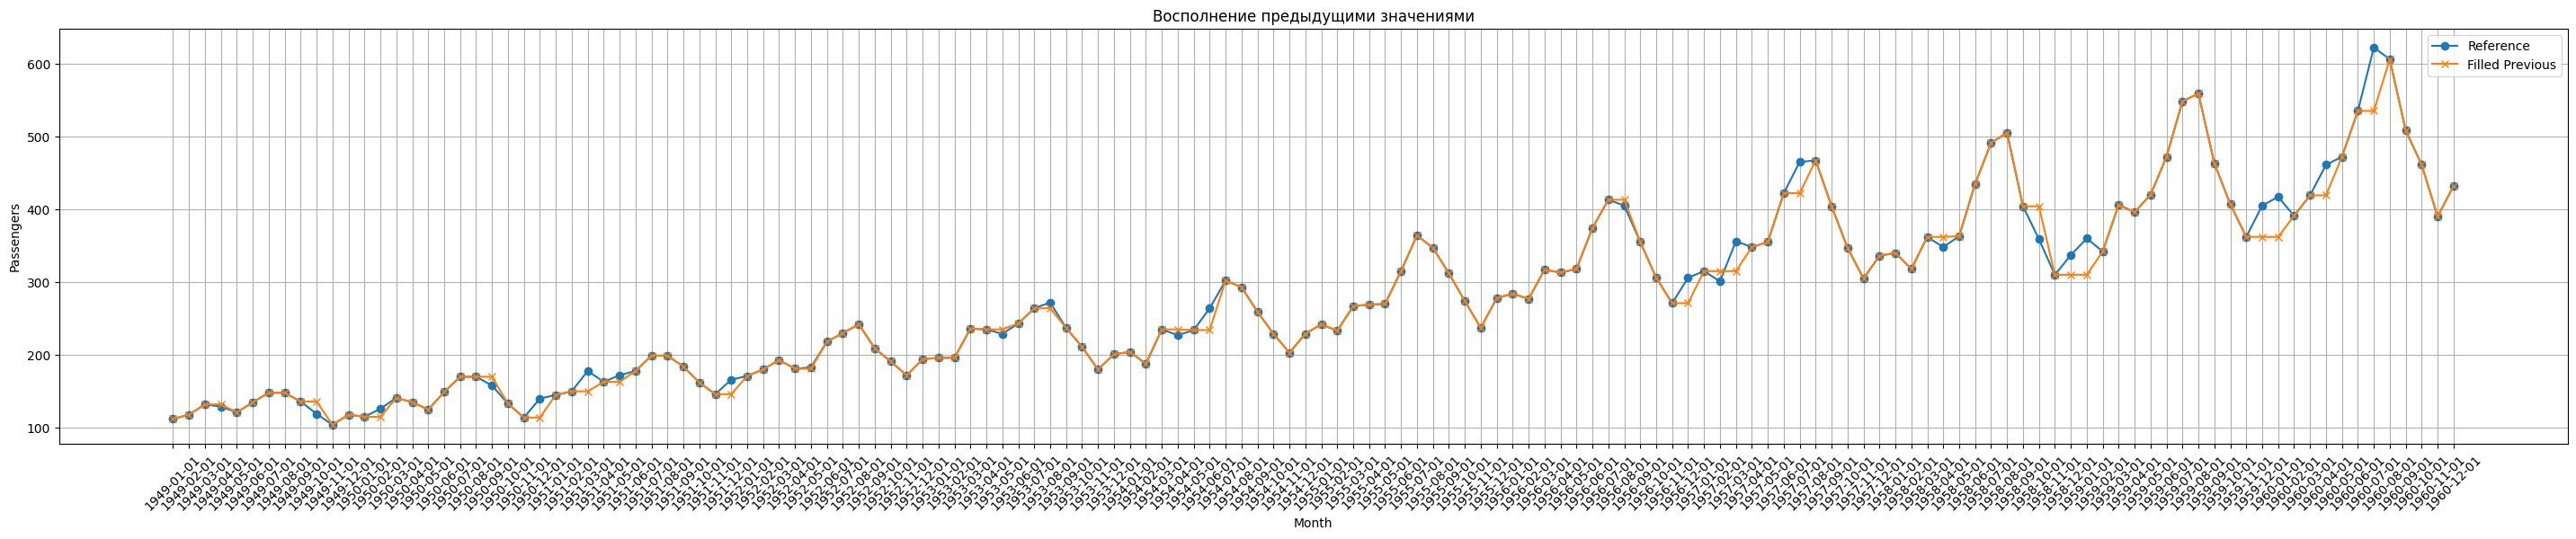

In [7]:
# Восполнение предыдущими значениями
df['filled_previous'] = df['target'].fillna(method='ffill')

# График
plt.figure(figsize=(36, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['filled_previous'], label='Filled Previous', marker='x')
plt.title('Восполнение предыдущими значениями')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Восполнение данных с помощью скользящего среднего


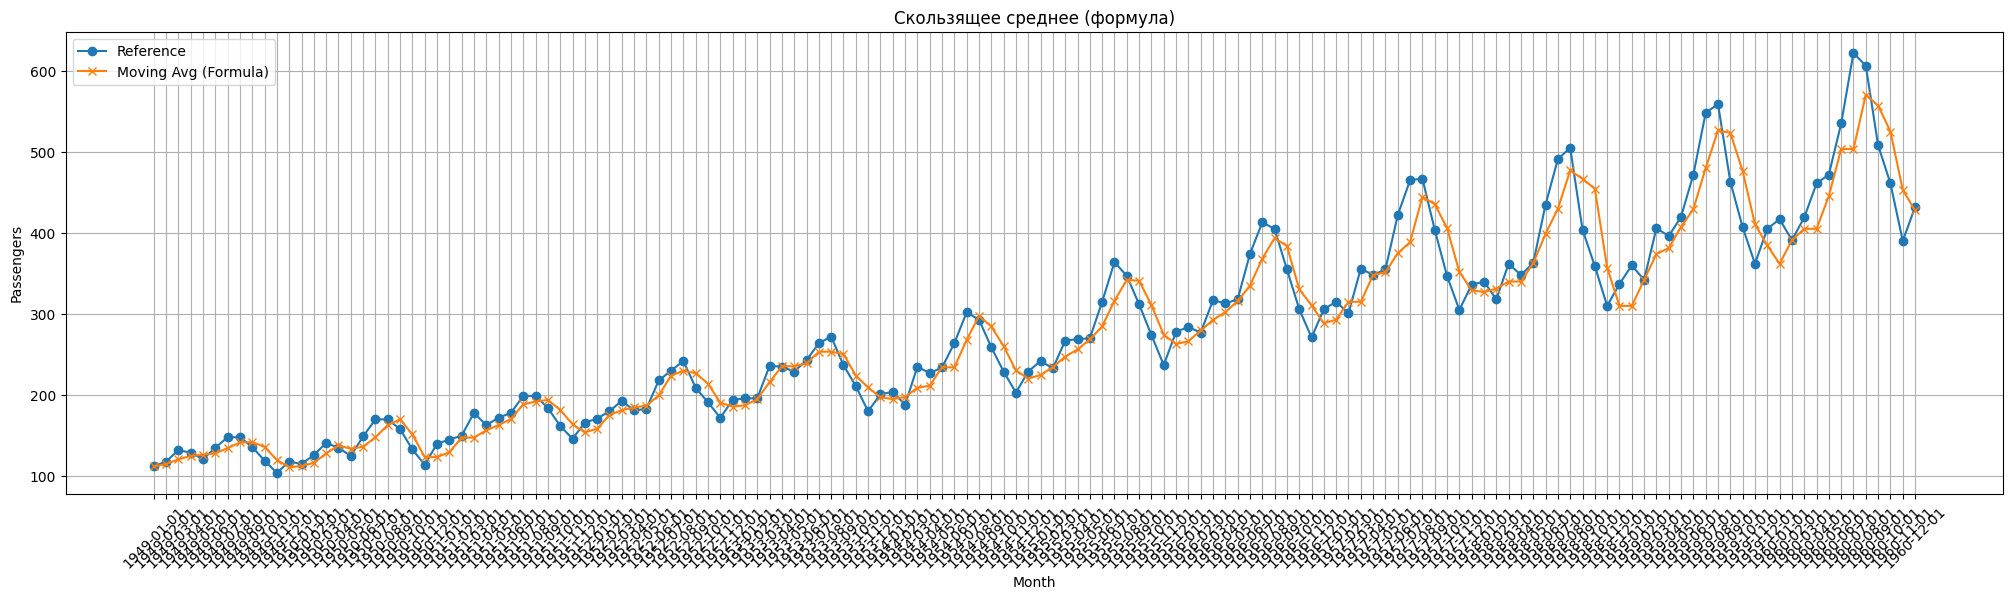

In [14]:
# Скользящее среднее с использованием формулы
window = 3
df['moving_avg_formula'] = df['target'].rolling(window=window, min_periods=1).mean()

# График
plt.figure(figsize=(25, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['moving_avg_formula'], label='Moving Avg (Formula)', marker='x')
plt.title('Скользящее среднее (формула)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


 Скользящее среднее с использованием метода rolling


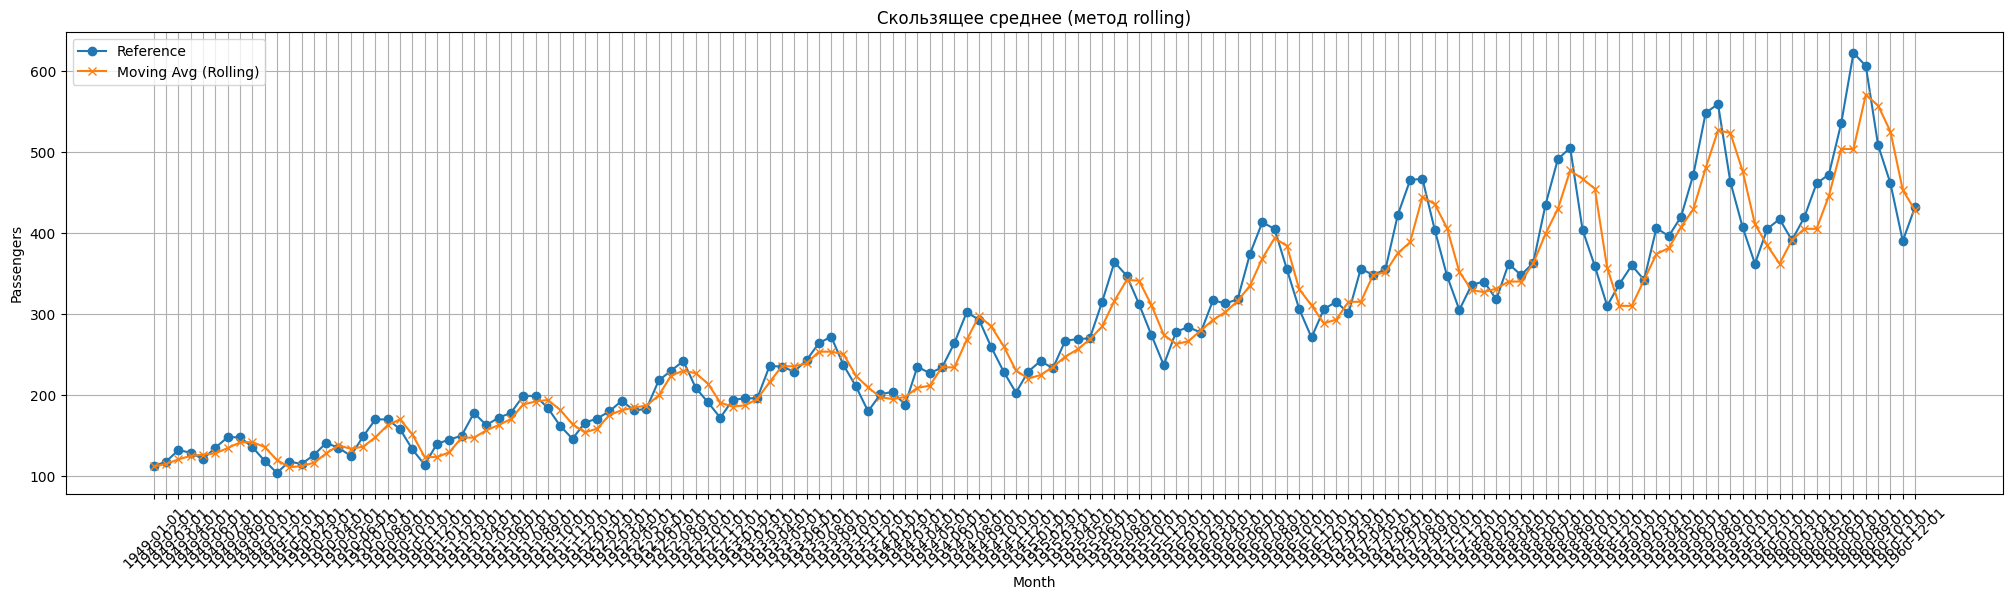

In [12]:
# Скользящее среднее с использованием метода rolling
df['moving_avg_rolling'] = df['target'].rolling(window=window, min_periods=1).mean()

# График
plt.figure(figsize=(25, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['moving_avg_rolling'], label='Moving Avg (Rolling)', marker='x')
plt.title('Скользящее среднее (метод rolling)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


 Интерполяция с использованием формулы


C:\Users\user\AppData\Local\Temp\ipykernel_16532\1214511097.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_idx = df.loc[:idx][df['target'].notna()].last_valid_index()
C:\Users\user\AppData\Local\Temp\ipykernel_16532\1214511097.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  next_idx = df.loc[idx:][df['target'].notna()].first_valid_index()
C:\Users\user\AppData\Local\Temp\ipykernel_16532\1214511097.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_idx = df.loc[:idx][df['target'].notna()].last_valid_index()
C:\Users\user\AppData\Local\Temp\ipykernel_16532\1214511097.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  next_idx = df.loc[idx:][df['target'].notna()].first_valid_index()
C:\Users\user\AppData\Local\Temp\ipykernel_16532\1214511097.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_idx = df.loc[

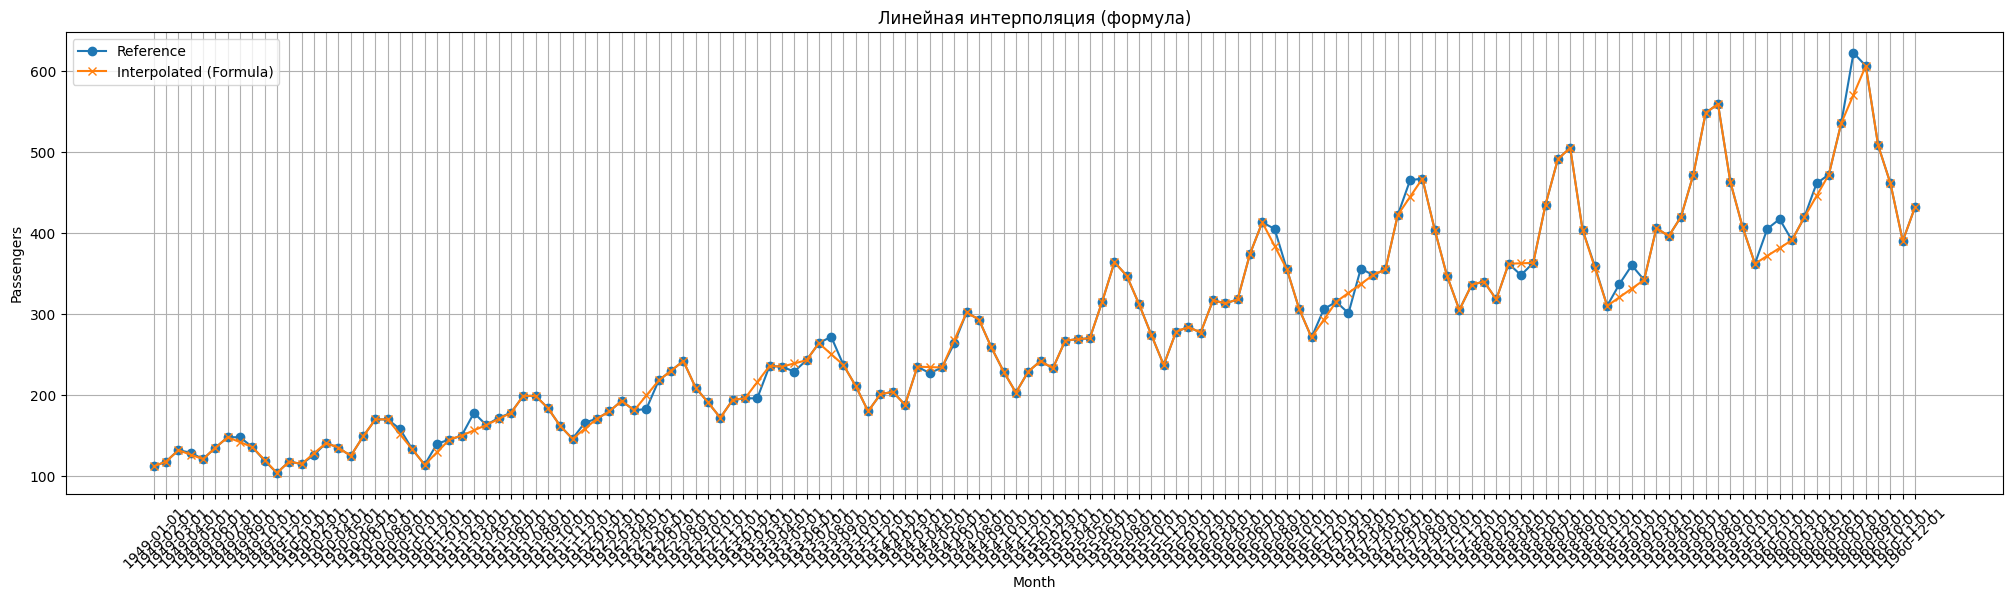

In [17]:
# Линейная интерполяция с использованием формулы
def linear_interpolation(row):
    if pd.isna(row['target']):
        idx = row.name
        prev_idx = df.loc[:idx][df['target'].notna()].last_valid_index()
        next_idx = df.loc[idx:][df['target'].notna()].first_valid_index()

        if prev_idx is not None and next_idx is not None:
            x0, y0 = prev_idx, df.loc[prev_idx, 'target']
            x1, y1 = next_idx, df.loc[next_idx, 'target']
            x = idx
            y = (y0 * (x1 - x) + y1 * (x - x0)) / (x1 - x0)
            return y
    return row['target']

df['interpolated_formula'] = df.apply(linear_interpolation, axis=1)

# График
plt.figure(figsize=(25,6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['interpolated_formula'], label='Interpolated (Formula)', marker='x')
plt.title('Линейная интерполяция (формула)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Интерполяция с использованием метода interpolate


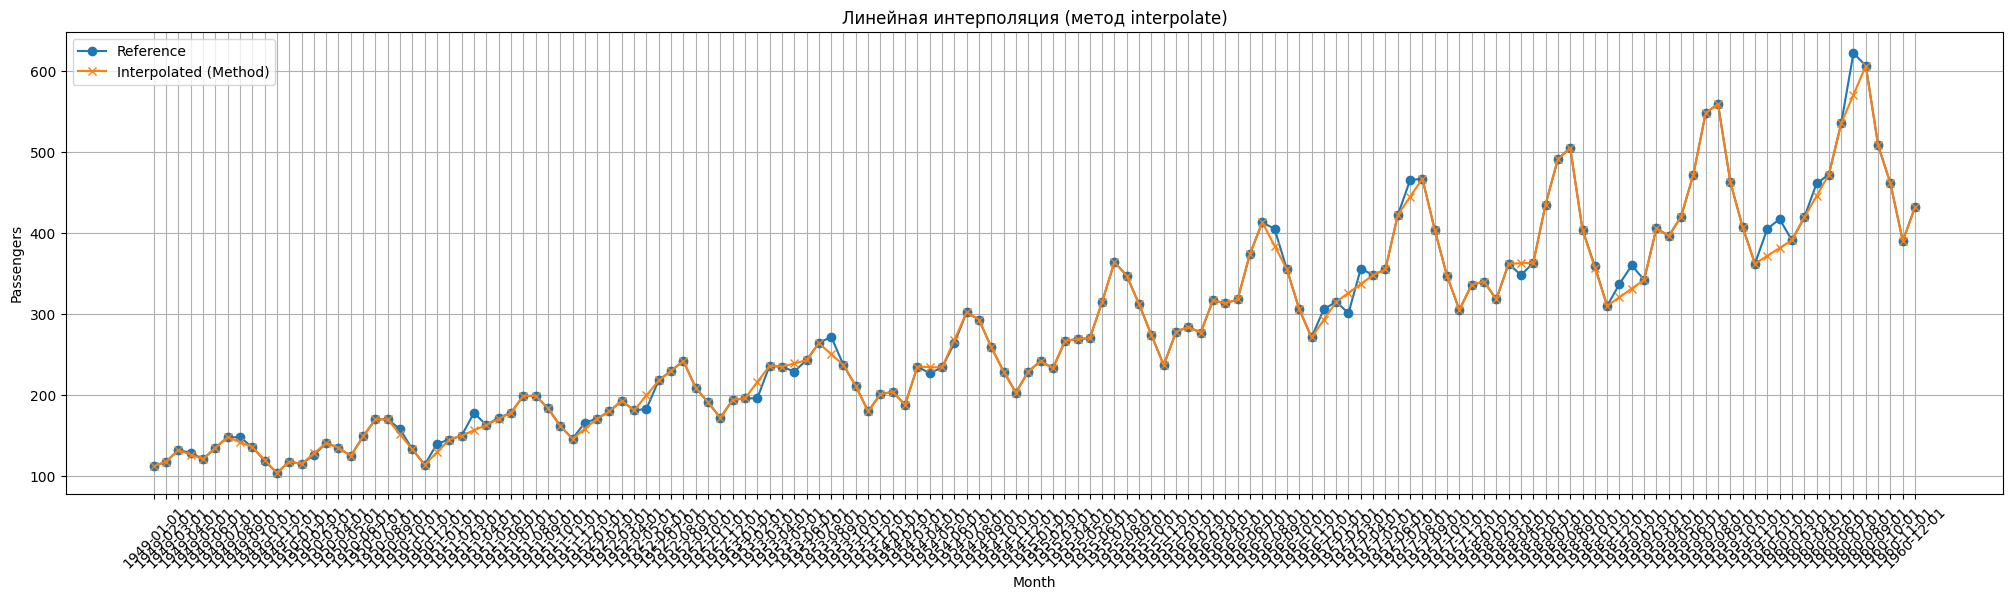

In [19]:
# Линейная интерполяция с использованием метода interpolate
df['interpolated_method'] = df['target'].interpolate(method='linear')

# График
plt.figure(figsize=(25, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['interpolated_method'], label='Interpolated (Method)', marker='x')
plt.title('Линейная интерполяция (метод interpolate)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Экспоненциальное сглаживание


C:\Users\user\AppData\Local\Temp\ipykernel_16532\3112558709.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.19999999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'smoothed_formula'] = d * df.loc[i-1, 'smoothed_formula'] + (1 - d) * df.loc[i, 'reference']


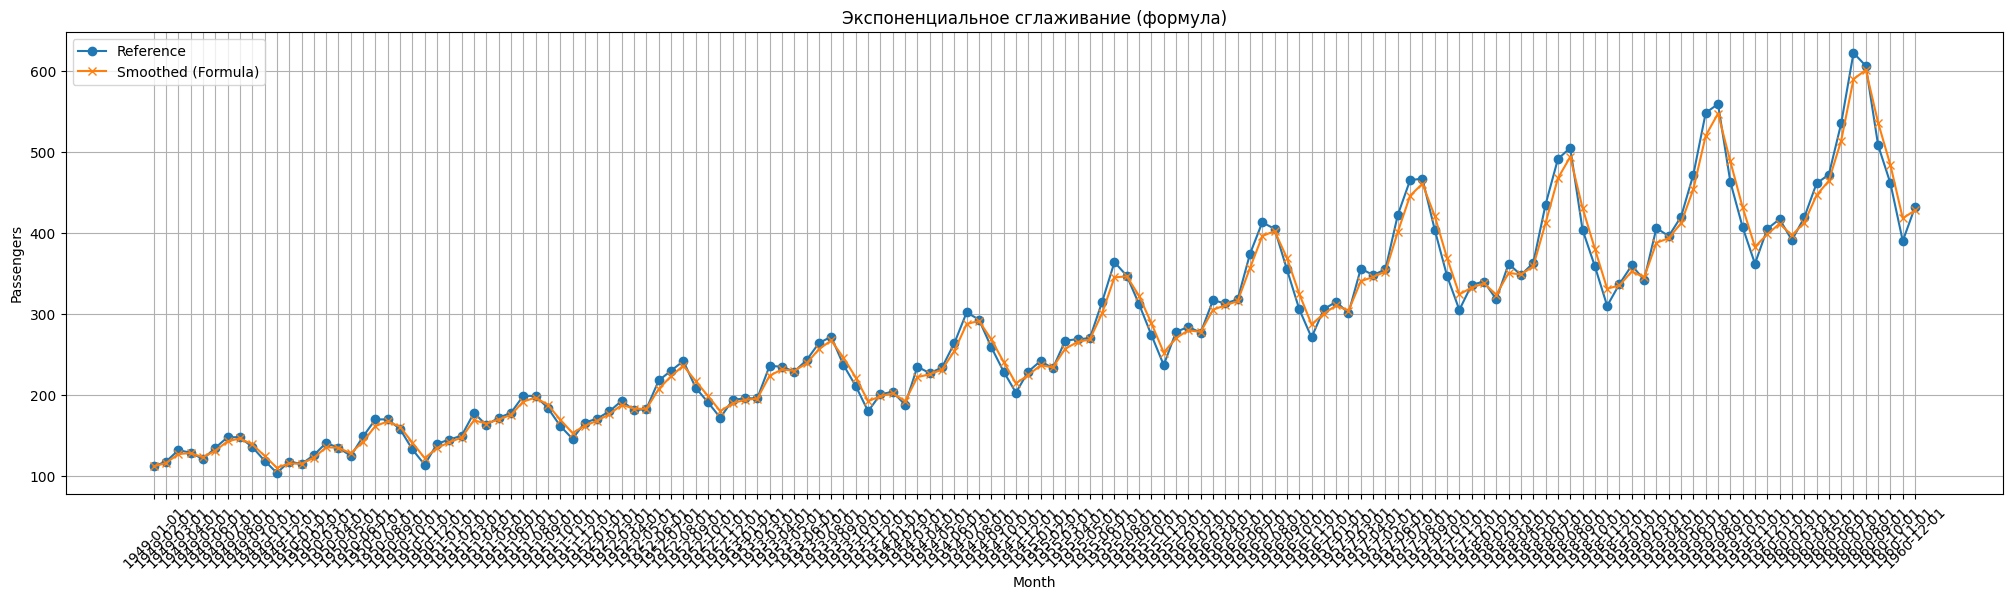

In [20]:
# Экспоненциальное сглаживание с использованием формулы
d = 0.3  # коэффициент сглаживания
df['smoothed_formula'] = df['reference'].copy()
for i in range(1, len(df)):
    df.loc[i, 'smoothed_formula'] = d * df.loc[i-1, 'smoothed_formula'] + (1 - d) * df.loc[i, 'reference']

# График
plt.figure(figsize=(25, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['smoothed_formula'], label='Smoothed (Formula)', marker='x')
plt.title('Экспоненциальное сглаживание (формула)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


 Экспоненциальное сглаживание с использованием метода ewm


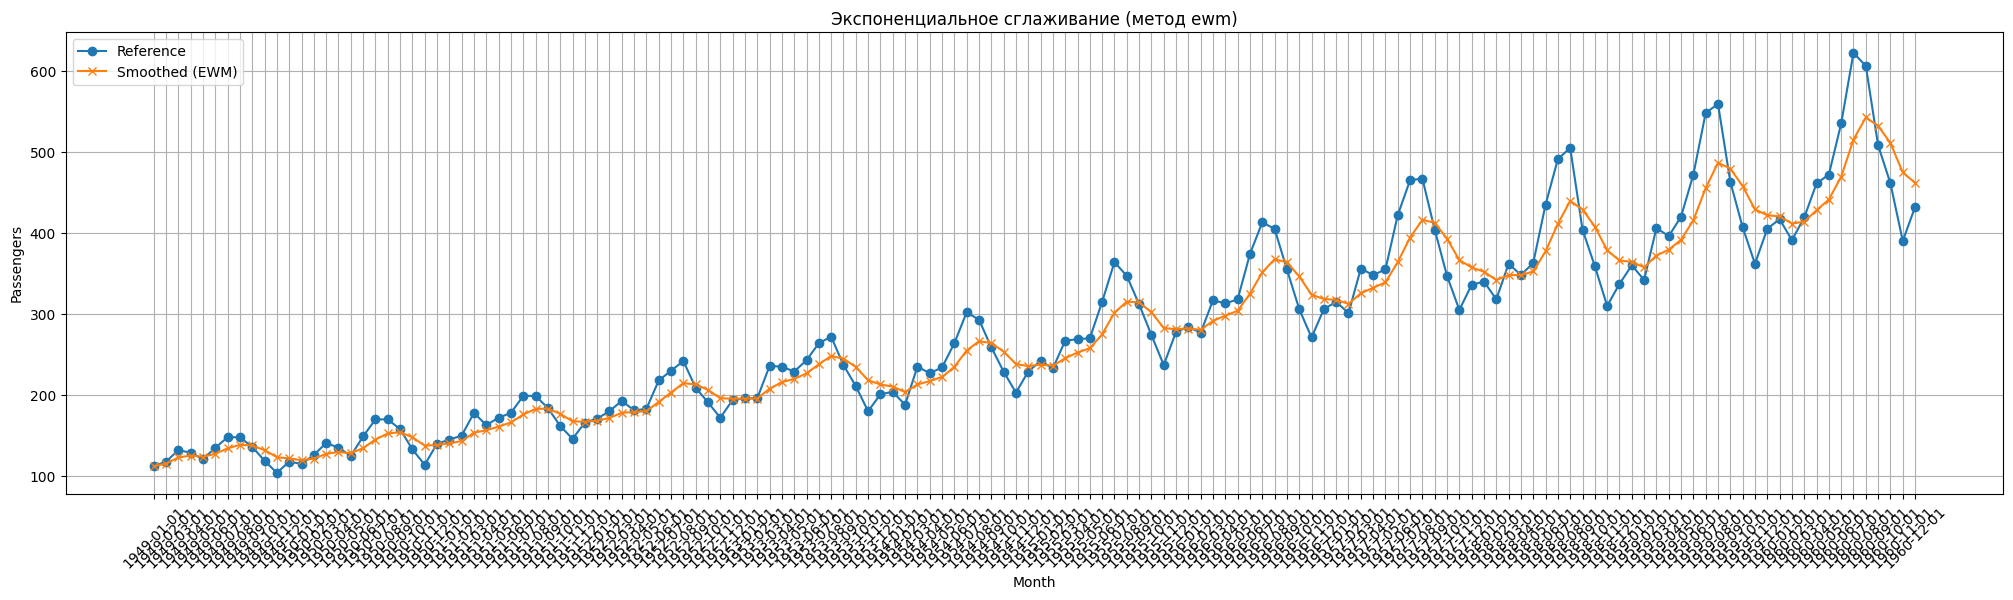

In [22]:
# Экспоненциальное сглаживание с использованием метода ewm
df['smoothed_ewm'] = df['reference'].ewm(alpha=0.3).mean()

# График
plt.figure(figsize=(25, 6))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['smoothed_ewm'], label='Smoothed (EWM)', marker='x')
plt.title('Экспоненциальное сглаживание (метод ewm)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
